### Getting Spotify Data From Kaggle

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`


## Understanding the Data

In [2]:

using CSV
using DataFrames

In [3]:
# Load the CSV file into a DataFrame
df = CSV.read("spotify_songs.csv", DataFrame)
df

Row,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
,String31,String,String,Int64,String31,String,Date,String,String31,String7,String31,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754
2,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600
3,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-5,0.11,0.613,124.008,176616
4,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-6,0.204,0.277,121.956,169093
5,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0.0,0.0833,0.725,123.976,189052
6,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0.0,0.143,0.585,124.982,163049
7,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0.0,0.176,0.152,112.648,187675
8,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-6,0.111,0.367,127.936,207619
9,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-6,0.637,0.366,127.015,193187


In [25]:
df(rows)

UndefVarError: UndefVarError: `rows` not defined

## Preprocess Data

In [4]:
using Chain, Dates, DataFrames

spotify = @chain df begin
    dropmissing(:track_popularity)  # Remove rows with missing values
    DataFrames.transform(:track_popularity => ByRow(x -> x >= 50) => :is_popular)  # Add binary 'is_popular'
    DataFrames.transform(:track_album_release_date => ByRow(year) => :year)  # Extract year
    select(Not(:track_name, :track_id, :track_artist, :playlist_id, 
               :playlist_name, :mode, :track_album_name, 
               :track_album_id, :key, :track_album_release_date))  # Select relevant columns
end

Row,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular,year
,Int64,String7,String31,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Bool,Int64
1,66,pop,dance pop,0.748,0.916,-2.634,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,true,2019
2,67,pop,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,true,2019
3,70,pop,dance pop,0.675,0.931,-3.432,0.0742,0.0794,2.33e-5,0.11,0.613,124.008,176616,true,2019
4,60,pop,dance pop,0.718,0.93,-3.778,0.102,0.0287,9.43e-6,0.204,0.277,121.956,169093,true,2019
5,69,pop,dance pop,0.65,0.833,-4.672,0.0359,0.0803,0.0,0.0833,0.725,123.976,189052,true,2019
6,67,pop,dance pop,0.675,0.919,-5.385,0.127,0.0799,0.0,0.143,0.585,124.982,163049,true,2019
7,62,pop,dance pop,0.449,0.856,-4.788,0.0623,0.187,0.0,0.176,0.152,112.648,187675,true,2019
8,69,pop,dance pop,0.542,0.903,-2.419,0.0434,0.0335,4.83e-6,0.111,0.367,127.936,207619,true,2019
9,68,pop,dance pop,0.594,0.935,-3.562,0.0565,0.0249,3.97e-6,0.637,0.366,127.015,193187,true,2019


In [5]:
using DataFrames

println("Missing values per column:")
println(map(col -> count(ismissing, col), eachcol(spotify)))

Missing values per column:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Exploratory Data Analysis (Visualizing)

### Stat Summary

In [6]:
describe(spotify, :mean, :std, :min, :median, :max)

Row,variable,mean,std,min,median,max
,Symbol,Union…,Union…,Any,Union…,Any
1,track_popularity,42.4771,24.9841,0,45.0,100
2,playlist_genre,,,edm,,rock
3,playlist_subgenre,,,album rock,,urban contemporary
4,danceability,0.65485,0.145085,0.0,0.672,0.983
5,energy,0.698619,0.18091,0.000175,0.721,1.0
6,loudness,-6.7195,2.98844,-46.448,-6.166,1.275
7,speechiness,0.107068,0.101314,0.0,0.0625,0.918
8,acousticness,0.175334,0.219633,0.0,0.0804,0.994
9,instrumentalness,0.0847472,0.22423,0.0,1.61e-5,0.994


### Plots

### Correlation Plot

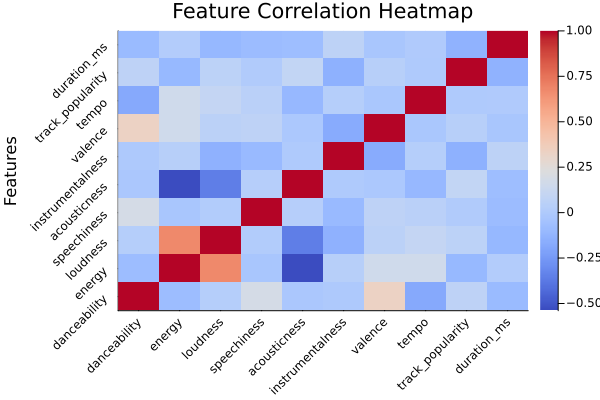

In [7]:
using DataFrames, StatsPlots, Statistics

# Example: Calculate the correlation matrix for numerical features
features = [:danceability, :energy, :loudness, :speechiness, :acousticness, :instrumentalness, :valence, :tempo, :track_popularity, :duration_ms]
# Convert selected features to a matrix
data_matrix = Matrix(df[:, features])

# Compute correlation matrix
corr_matrix = cor(data_matrix)

# Convert Symbols to Strings for plotting
feature_labels = string.(features)


# Plot heatmap
heatmap(
    feature_labels, feature_labels, corr_matrix,
    title = "Feature Correlation Heatmap",
    xlabel = "Features",
    ylabel = "Features",
    rotation = 45,
    color = :coolwarm
)

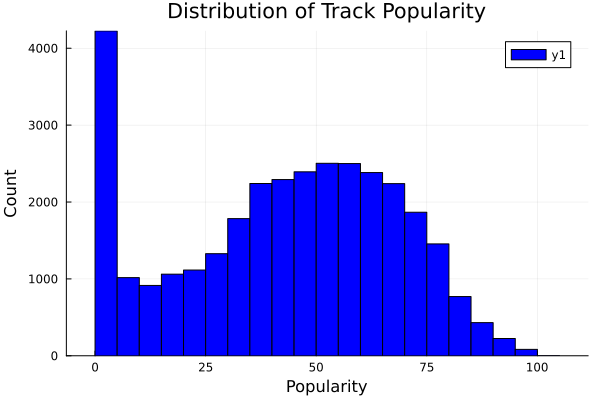

In [8]:
@df spotify histogram(
    :track_popularity,
    bins = 20,
    title = "Distribution of Track Popularity",
    xlabel = "Popularity",
    ylabel = "Count",
    color = :blue
)


### Popularity over the Years

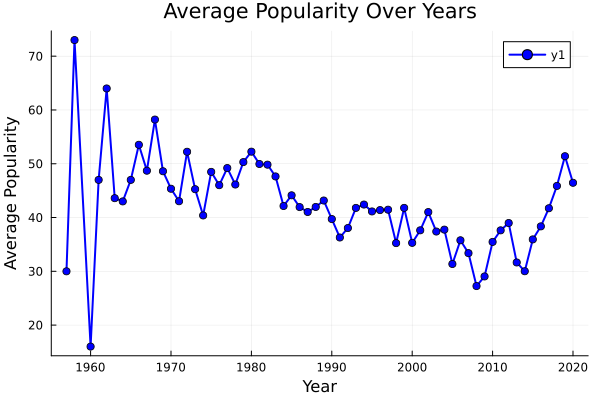

In [9]:

using DataFrames, Statistics, StatsPlots
yearly_popularity = combine(groupby(spotify, :year), :track_popularity => mean => :avg_popularity)
sort!(yearly_popularity, :year)
@df yearly_popularity plot(
    :year, :avg_popularity,
    title = "Average Popularity Over Years",
    xlabel = "Year",
    ylabel = "Average Popularity",
    marker = :circle,
    linewidth = 2,
    color = :blue
)


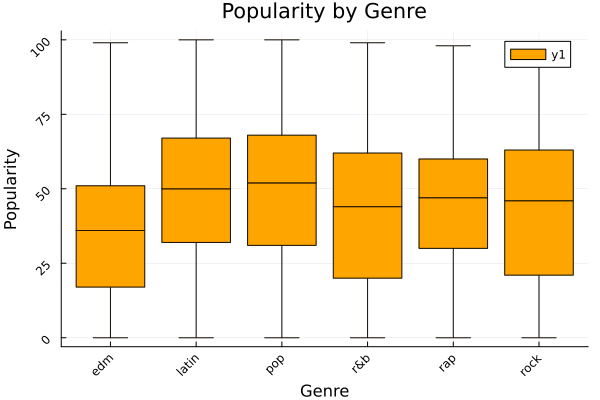

In [10]:
@df spotify boxplot(
    :playlist_genre, :track_popularity,
    title = "Popularity by Genre",
    xlabel = "Genre",
    ylabel = "Popularity",
    rotation = 45,  # Rotate x-axis labels
    color = :orange
)

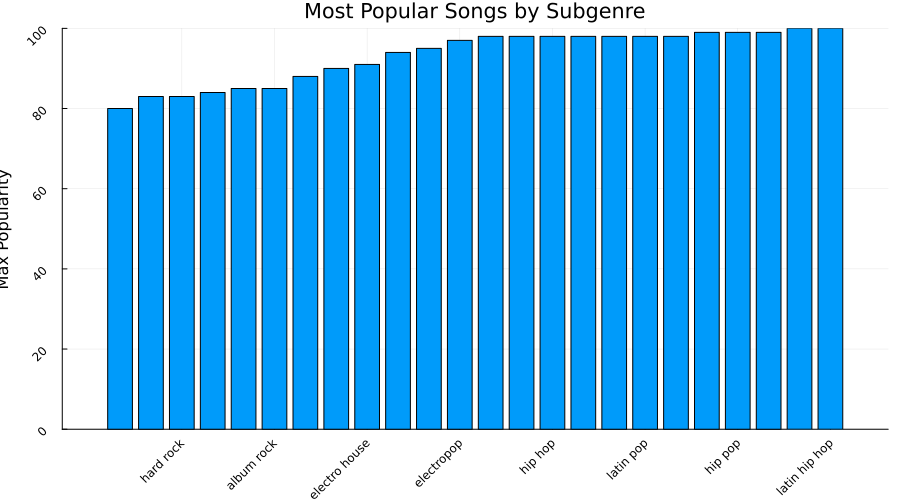

In [11]:
using Plots
most_popular_by_genre = @chain spotify begin
    groupby(:playlist_subgenre)  # Group by subgenre
    combine(:track_popularity => maximum => :max_popularity)  # Find max popularity for each group
    sort(:max_popularity, rev=false)  # Sort by popularity in descending order
end

x = most_popular_by_genre.playlist_subgenre  # Subgenre names
y = most_popular_by_genre.max_popularity  # Maximum popularity values


plot(x, y, seriestype = :bar, 
        xlabel = "Subgenre", ylabel = "Max Popularity", 
        title = "Most Popular Songs by Subgenre", 
        xticks=:auto, legend=false, rotation=45, size=(900, 500))


## 

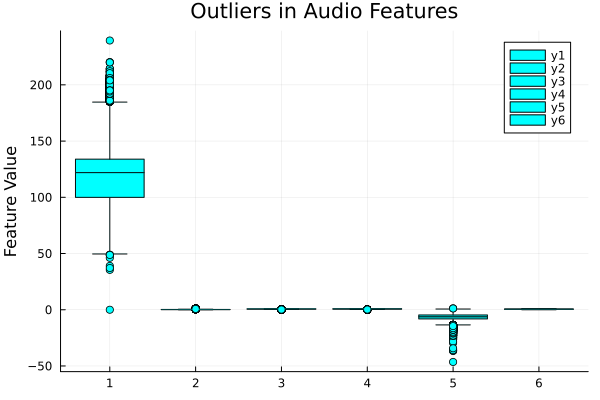

In [12]:
@df spotify boxplot(
    [:tempo, :liveness, :danceability, :energy, :loudness, :valence],
    title = "Outliers in Audio Features",
    ylabel = "Feature Value",
    color = :cyan
)

## Modeling

### Prepping the Data

In [13]:
import Pkg; Pkg.add("GLM"); Pkg.add("MLBase"); Pkg.add("MLJModels");



   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\User\.julia\environments\v1.10\Project.toml`
  [d491faf4] + MLJModels v0.17.5
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`


In [14]:

using DataFrames, MLJBase, MLJModels

# Define features to standardize
features = [:danceability, :energy, :loudness, :speechiness, 
            :acousticness, :instrumentalness, :liveness, 
            :valence, :tempo, :duration_ms]

# Create a subset of Features
feature_data = Matrix(spotify[:, features])  # Convert to Matrix for Standardizer

# Fit Standardizer
scaler = Standardizer()
mach_scaler = machine(scaler, feature_data)
fit!(mach_scaler)

# Transform Features
scaled_features = MLJBase.transform(mach_scaler, feature_data)

# Combine scaled features with the rest of the DataFrame
scaled_feature_names = Symbol.(string.(features, "_scaled"))
scaled_df = DataFrame(scaled_features, scaled_feature_names)
spotify_standardized = hcat(spotify[:, Not(features)], scaled_df)

# Check result
println("Transformed DataFrame Columns:")
println(names(spotify_standardized))

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJModels.Standardizer` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{AbstractMatrix{Continuous}}
│ 
│ fit_data_scitype(model) = Tuple{Union{Table, AbstractVector{<:Continuous}}}
└ @ MLJBase C:\Users\User\.julia\packages\MLJBase\7nGJF\src\machines.jl:237
┌ Info: Training machine(Standardizer(features = Symbol[], …), …).
└ @ MLJBase C:\Users\User\.julia

MethodError: MethodError: no method matching fit(::UnivariateStandardizer, ::Int64, ::Matrix{Float64})

Closest candidates are:
  fit(!Matched::UnivariateDiscretizer, ::Int64, ::Any)
   @ MLJModels C:\Users\User\.julia\packages\MLJModels\N6vpy\src\builtins\Transformers.jl:201
  fit(::UnivariateStandardizer, ::Int64, !Matched::AbstractVector{T}) where T<:Real
   @ MLJModels C:\Users\User\.julia\packages\MLJModels\N6vpy\src\builtins\Transformers.jl:421
  fit(!Matched::UnivariateTimeTypeToContinuous, ::Int64, ::Any)
   @ MLJModels C:\Users\User\.julia\packages\MLJModels\N6vpy\src\builtins\Transformers.jl:346
  ...


### Update scale features and split data

In [15]:
using Random, GLM, MLBase, ROCAnalysis, StatsPlots

# Define scaled features and target
scaled_features = [:danceability_scaled, :energy_scaled, :loudness_scaled, 
                   :speechiness_scaled, :acousticness_scaled, :instrumentalness_scaled,
                   :liveness_scaled, :valence_scaled, :tempo_scaled, :duration_ms_scaled]
target = :is_popular

# Train-test split
Random.seed!(42)  # For reproducibility
train_ratio = 0.8
n = nrow(spotify_standardized)
train_indices = sample(1:n, round(Int, train_ratio * n), replace=false)
train_set = spotify_standardized[train_indices, :]
test_set = spotify_standardized[setdiff(1:n, train_indices), :]

UndefVarError: UndefVarError: `spotify_standardized` not defined

### Training the Logistic Regression Model

In [16]:
# Formula for logistic regression
formula = @formula(is_popular ~ danceability_scaled + energy_scaled + loudness_scaled +
                                  speechiness_scaled + acousticness_scaled +
                                  instrumentalness_scaled + liveness_scaled +
                                  valence_scaled + tempo_scaled + duration_ms_scaled)

# Train logistic regression model
model = glm(formula, train_set, Binomial(), LogitLink())

# Print model summary
model

UndefVarError: UndefVarError: `train_set` not defined

liveness and danceability not statistically signifcant 

Significant Predictors:

Features like energy, loudness, speechiness, instrumentalness, and valence strongly influence popularity.
Positive coefficients like valence and loudness suggest these features increase the likelihood of popularity.
Negative coefficients like energy and instrumentalness suggest these features decrease the likelihood.
Practical Implications:

To make a song more likely to be popular:
Increase valence (happiness) and loudness.
Avoid too much energy, instrumentalness, or speechiness.
Feature Ranking:

Based on the magnitude of the coefficients, instrumentalness, energy, and duration_ms have the strongest impact on popularity.

### Making Predictions

In [17]:
# Predict probabilities
probabilities = predict(model, test_set)

# Convert probabilities to binary predictions (threshold = 0.5)
predictions = probabilities .>= 0.5

UndefVarError: UndefVarError: `predict` not defined

In [18]:
using MLBase, ROCAnalysis, StatsPlots

# Filter out missing values explicitly
valid_indices = .!ismissing.(probabilities)  # Remove rows with missing probabilities
filtered_labels = convert(Vector{Union{Missing, Int64}}, Int.(true_labels[valid_indices]))
filtered_probs = convert(Vector{Union{Missing, Float64}}, probabilities[valid_indices])

# Ensure no actual missing values remain
filtered_labels = coalesce.(filtered_labels, 0)  # Replace missing with 0 if any
filtered_probs = coalesce.(filtered_probs, 0.0) # Replace missing with 0.0 if any

# Confusion Matrix
conf_matrix = confusion_matrix(filtered_labels .== 1, filtered_probs .>= 0.5)

# Access components by class labels
tn = conf_matrix(0, 0)  # True Negative
fp = conf_matrix(0, 1)  # False Positive
fn = conf_matrix(1, 0)  # False Negative
tp = conf_matrix(1, 1)  # True Positive

# Calculate Metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print Metrics
println("Confusion Matrix:")
println(conf_matrix)
println("Accuracy: ", round(accuracy, digits=4))
println("Precision: ", round(precision, digits=4))
println("Recall: ", round(recall, digits=4))
println("F1-Score: ", round(f1_score, digits=4))

# Generate ROC Curve and Compute AUC
roc_curve = ROCAnalysis.roc(filtered_labels, filtered_probs)  # Cleaned input
auc_value = ROCAnalysis.auc(roc_curve)

# Print AUC
println("AUC: ", round(auc_value, digits=4))

# Plot ROC Curve
plot(
    roc_curve,
    title = "ROC Curve for Logistic Regression",
    xlabel = "False Positive Rate",
    ylabel = "True Positive Rate",
    linewidth = 2,
    color = :blue
)




UndefVarError: UndefVarError: `probabilities` not defined

In [19]:
using MLBase, ROCAnalysis, StatsPlots

roc_curve = ROCAnalysis.roc(clean_labels, clean_probs)  # Use cleaned vectors
auc_value = ROCAnalysis.auc(roc_curve)

# Print AUC
println("AUC: ", round(auc_value, digits=4))

# Plot ROC Curve
plot(
    roc_curve,
    title = "ROC Curve for Logistic Regression",
    xlabel = "False Positive Rate",
    ylabel = "True Positive Rate",
    linewidth = 2,
    color = :blue
)


UndefVarError: UndefVarError: `clean_labels` not defined

## Eval the mod

In [20]:
# Evaluate
probabilities = predict(model, test_set)
predictions = probabilities .>= 0.5
accuracy = mean(predictions .== test_set.is_popular)
println("Model Accuracy: ", accuracy)

UndefVarError: UndefVarError: `predict` not defined

In [21]:
probabilities_small = predict(smaller_model, test_set)
predictions_small = probabilities_small .>= 0.5
accuracy_small = mean(predictions_small .== test_set.is_popular)
println("Smaller Model Accuracy: ", accuracy_small)

UndefVarError: UndefVarError: `predict` not defined

In [23]:
using Pkg
Pkg.add("ROCAnalysis")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`


In [24]:
using ROCAnalysis, StatsPlots

# Predict probabilities
probabilities = predict(model, test_set)

# Remove missing values
valid_indices = .!ismissing.(probabilities)
true_labels = Int.(test_set.is_popular[valid_indices])  # Convert Bool to Int
predicted_scores = probabilities[valid_indices]        # Filtered probabilities

# Generate the ROC curve
roc_curve = ROCAnalysis.roc(true_labels, predicted_scores)

# Compute and display AUC
auc_value = ROCAnalysis.auc(roc_curve)
println("AUC: ", auc_value)

# Plot the ROC curve
plot(
    roc_curve,
    title = "ROC Curve for Logistic Regression",
    xlabel = "False Positive Rate",
    ylabel = "True Positive Rate",
    linewidth = 2,
    color = :blue
)


UndefVarError: UndefVarError: `predict` not defined